# Introduction to neural network classification with TensorFlow

In this notebook we're going to classify something as one thing or another.

A few types of classfication problems:
  * Binary classification
  * Multiclass Classification
  * Multilabel Classification



## Creating data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y=  make_circles(n_samples,
                    noise=0.03,
                    random_state = 42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Let's Visualize the data!


In [4]:
import pandas as pd
circles= pd.DataFrame({"XO": X[:, 0], "X1": X[:, 1], "label":y})
circles

,XO,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


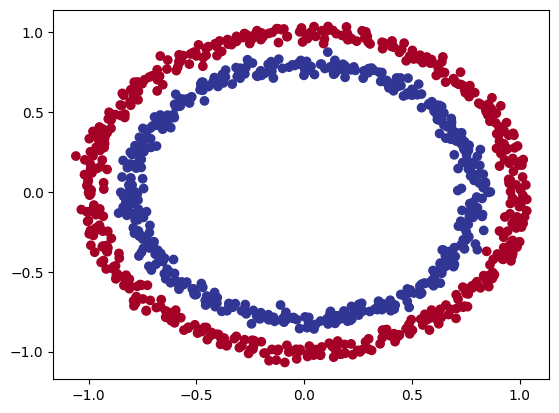

In [5]:
# Visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [6]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# view the first sample of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [20]:
import tensorflow as tf

# random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_1.fit(X, y , epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3265 - accuracy: 0.4120
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3195 - accuracy: 0.4130
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3181 - accuracy: 0.4150
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3003 - accuracy: 0.4180
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2797 - accuracy: 0.4190
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2533 - accuracy: 0.4200
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1872 - accuracy: 0.4310
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1688 - accuracy: 0.4340
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1563 - accuracy: 0.4360
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1534 - accuracy: 0.4370
Epoch 11/

Let's add an extra layer

In [10]:
# set seed
tf.random.set_seed(42)

# create a model
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# fit the model
model_1.fit(tf.expand_dims(X, axis=1), y , epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.3072 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4938
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4816
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4856
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5071
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4994
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4714
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4894
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4992
Epoch 11/

In [21]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.4850


[0.7188431024551392, 0.48500001430511475]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [11]:
# model 2 with activations
# random seed
tf.random.set_seed(42)

# model creation
model_2 =  tf.keras.Sequential([
    # tf.keras.Input(shape=(1000,2)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model
model_2.fit(X, y , epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.5267 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7500 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4490
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4570
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5230
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4620
Epoch 11/

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5150


[0.6943662166595459, 0.5149999856948853]

Still not even as good as guessing (~50% accuracy)... hmm...?

Let's remind ourselves of a couple more ways we can use to improve our models.

## Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 3.4735 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7367 - accuracy: 0.4600
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4790
Epoch 11/

In [23]:
prediction =  model_2.predict(X)

32/32 [==============================] - 0s 2ms/step


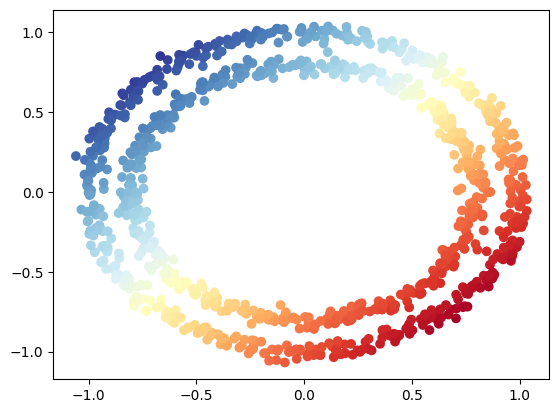

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=plt.cm.RdYlBu)

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

>🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

>**🔑 Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

## To visualize model's prediction, let's create a function
`plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

def pplot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predciting on X
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min,  x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # create X value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predcition
  y_pred = model.predict(x_in)

  # Check for multi class
  if len(y_pred[0]) >1 :
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred= np.argmax(y_pred, axis=1 ).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s= 40,  cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


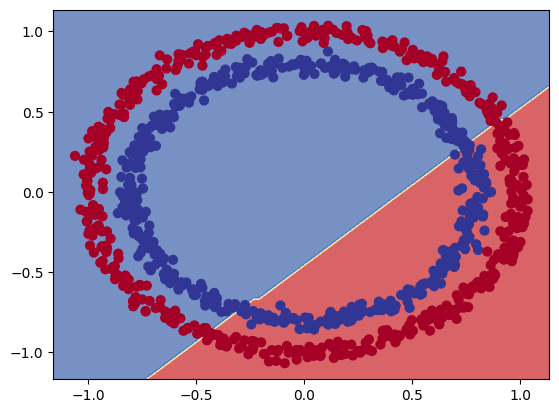

In [17]:
# check out the prediciton our model is making
pplot_decision_boundary(model=model_2, X=X, y=y)

In [29]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0, 1000 , 5)
y_regression = tf.range(100, 1100, 5) # y = X+100

# split data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test= y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [31]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [32]:
# set random seed
tf.random.set_seed(42)

# 1. create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the  model
model_3.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100 )

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 310.2253 - mae: 310.2253
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 169.3588 - mae: 169.3588
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 58.1631 - mae: 58.1631
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 86.0596 - mae: 86.0596
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 79.2558 - mae: 79.2558
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 46.9071 - mae: 46.9071
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 49.3802 - mae: 49.3802
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.2675 - mae: 42.2675
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.8302 - mae: 43.8302
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4549 - mae: 42.4549
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


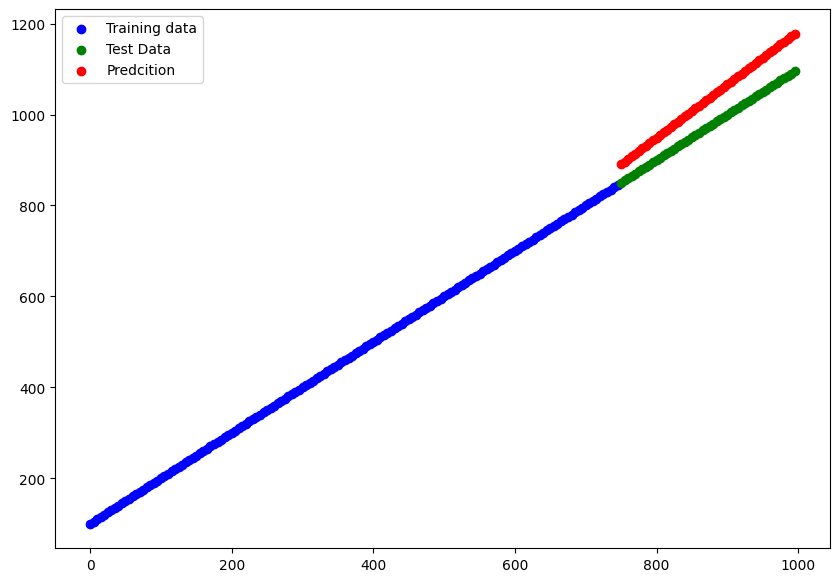

In [33]:
# make predcition with train model
y_preds =  model_3.predict(X_reg_test)

# plot the model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label ="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_preds, c="r", label = "Predcition")
plt.legend();

# Non-linearity

In [34]:
# set the random seed
tf.random.set_seed(42)

# create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation ="linear")
])

model_4.compile(
    loss="binary_crossentropy",
    optimizer =  tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]

)

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 6.2466 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2439 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2219 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1885 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1841 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1810 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1599 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1533 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1381 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1178 - accuracy: 0.4850
Epoch 11/

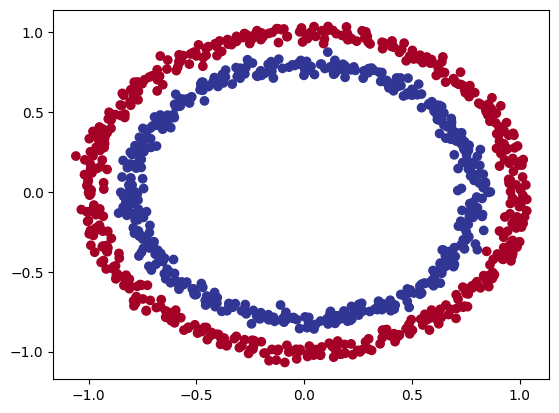

In [35]:
# check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


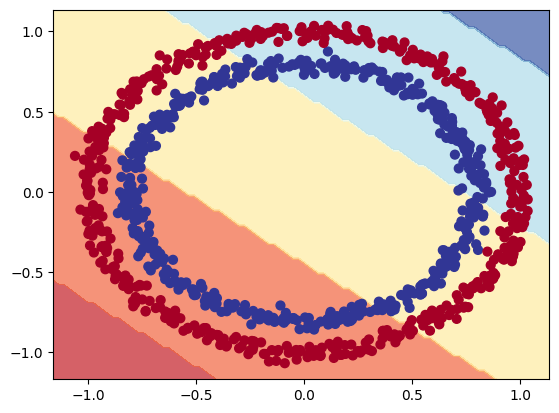

In [37]:
# check the prediction
pplot_decision_boundary(model= model_4,
                        X=X, y=y)

lets build non linear neural network

In [38]:
# set random seed
tf.random.set_seed(42)

# create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])
# compile the model
model_5.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# fit the model
history = model_5.fit(X, y , epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.7402 - accuracy: 0.4570
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3831 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2915 - accuracy: 0.4260
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2319 - accuracy: 0.4360
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1849 - accuracy: 0.4410
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1470 - accuracy: 0.4500
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1149 - accuracy: 0.4540
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0869 - accuracy: 0.4540
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0628 - accuracy: 0.4570
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0412 - accuracy: 0.4580
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


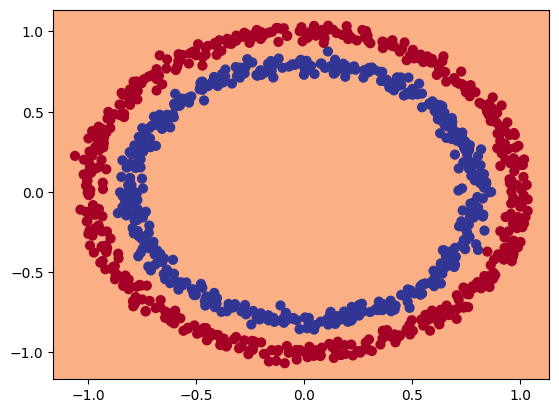

In [41]:
pplot_decision_boundary(model=model_5,
                        X=X, y=y)

In [42]:
# increaing layers in model 5

tf.random.set_seed(42)

# create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(30, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# compile the model
model_6.compile(loss= "binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
# fit the model
history = model_6.fit(X, y ,epochs= 30)

Epoch 1/30
32/32 [==============================] - 2s 4ms/step - loss: 0.6929 - accuracy: 0.5040
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.5150
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6210
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.8180
Epoch 7/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.9650
Epoch 8/30
32/32 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.9940
Epoch 9/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.9980
Epoch 10/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 1.0000
Epoch 11/30
32/32 [

313/313 [==============================] - 1s 2ms/step
doing binary classification


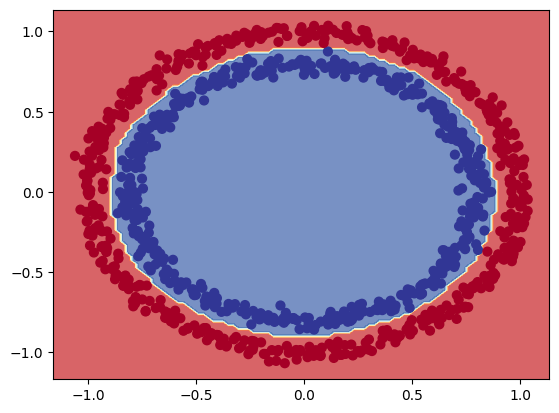

In [43]:
pplot_decision_boundary(model=model_6, X=X, y=y)

Text(0, 0.5, 'loss')

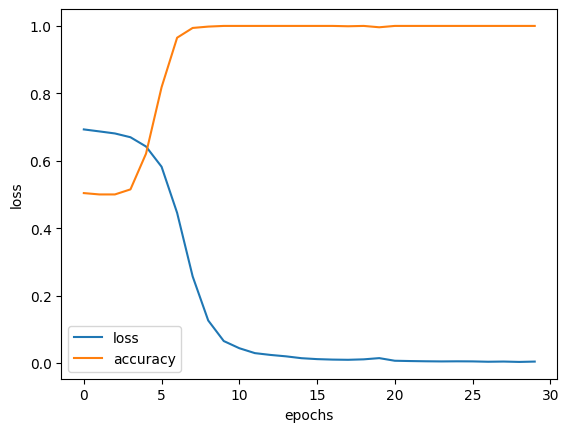

In [44]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [45]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000


[0.0027899632696062326, 1.0]

In [46]:
# create a toy tensor(Similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

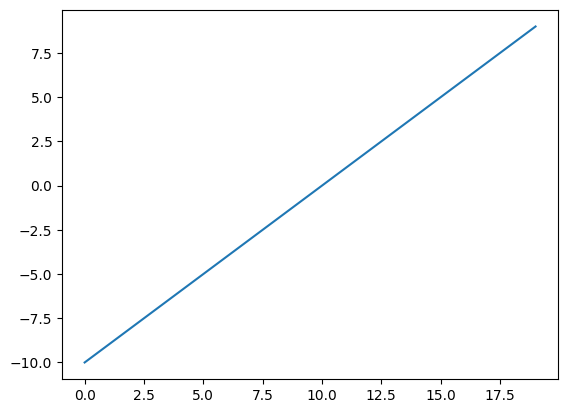

In [47]:
# visualize our toy tensor
plt.plot(A);

In [48]:
# let's start by replicating sigmoid - sigmoid(x) =1 /(1 = exp(-x))
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

# use the sigmoid function on toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

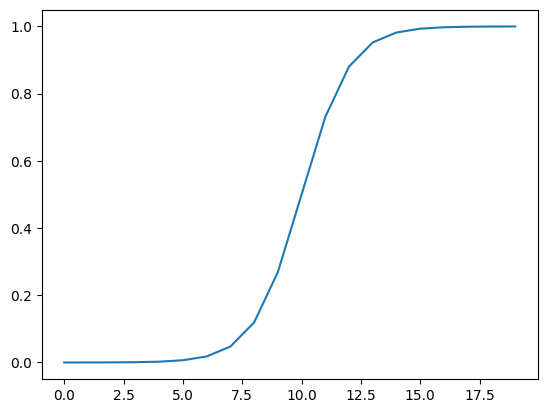

In [49]:
# plot toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [50]:
# let's recreate a relu function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

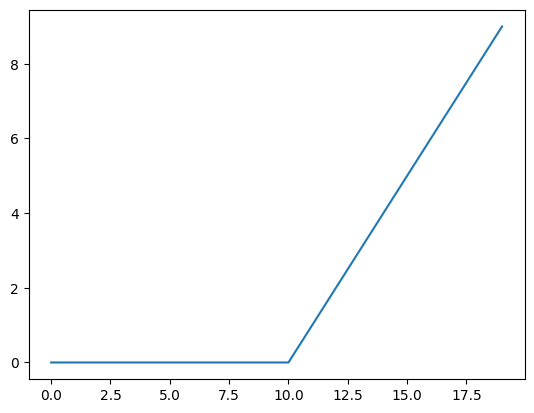

In [51]:
# plot relu
plt.plot(relu(A));

In [53]:
# let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [54]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

## Evaluating and Improving model

In [55]:
len(X)

1000

In [56]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=(0.2), random_state=42)

In [57]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((800, 2), (200, 2), (200,), (800,))

In [59]:
# recreate model and evaluate data

# set random seed
tf.random.set_seed(42)

# create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# fit the model
history = model_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6800 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5938
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6675
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.7812
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.8300
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8575
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.9175
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9875
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9862
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9862
Epoch 11/25
25/25 [

In [61]:
# Evaluate our model on the test set
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9950
Model loss on the test set: 0.03697113320231438
Model accuracy on the test set: 99.50%


313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


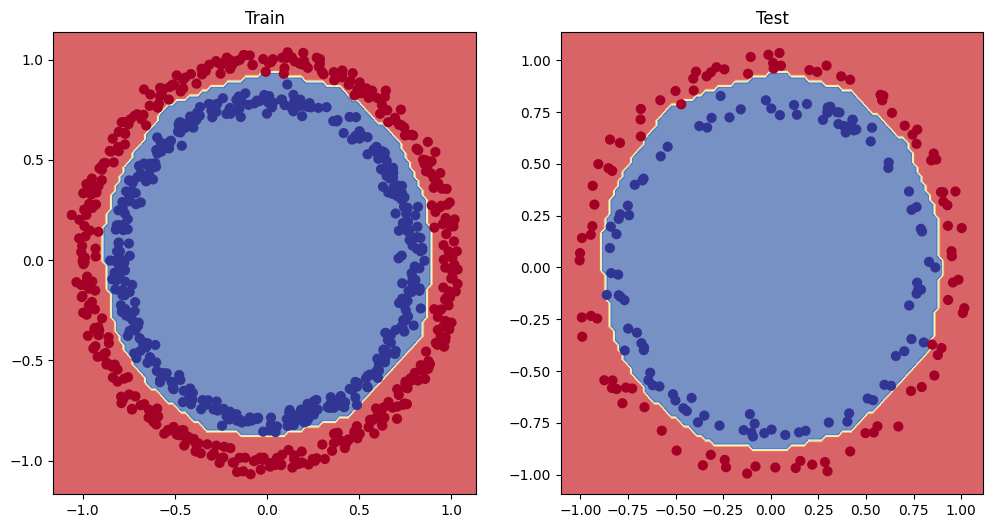

In [62]:
# plot the decision boundaries for training and test size
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
pplot_decision_boundary(model=model_7, X= X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
pplot_decision_boundary(model=model_7, X=X_test, y=y_test)

Plot the loss curve

Text(0.5, 1.0, 'Model_7 training curves')

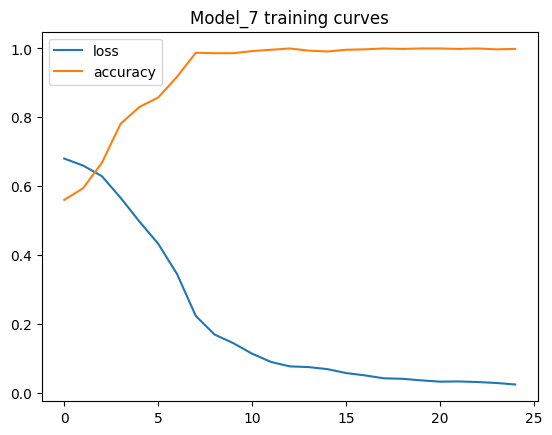

In [64]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we' re going to use the following steps:

* A learning rate **callback** - think of as an extra piece of functionality, you can add to your *while* its training.

* Another model

* A Modified loss curve plot.

In [67]:
# set random seed
tf.random.set_seed(42)

# create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_8.compile(
    loss="binary_crossentropy",
    optimizer= "Adam",
    metrics= ["accuracy"]
)

# create a learning rate callback
learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history = model_8.fit(X_train, y_train, epochs= 100, callbacks=[learning_rate_schedule])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7111 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7094 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

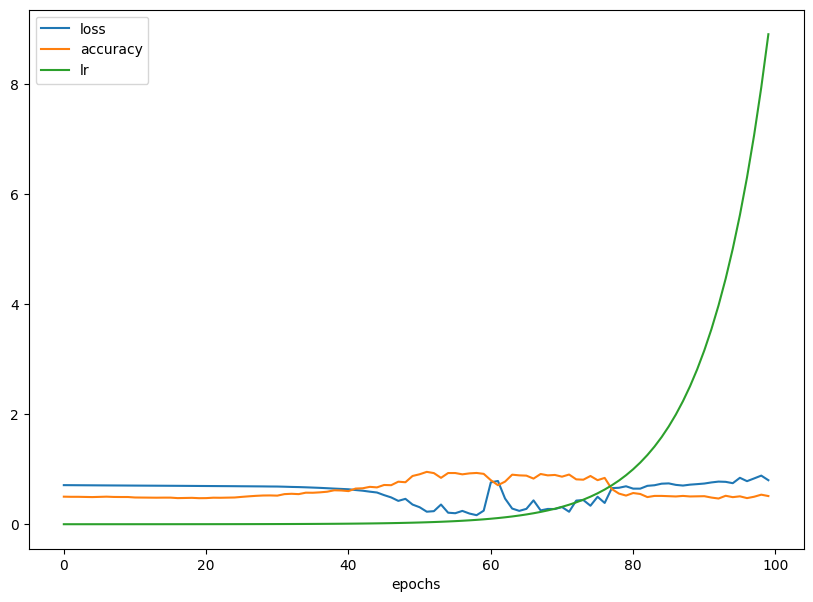

In [68]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs loss')

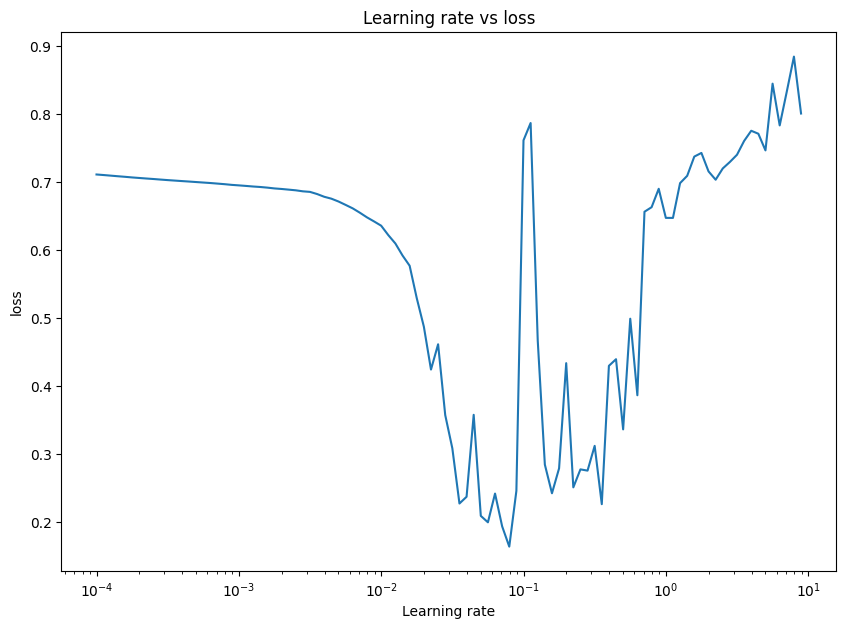

In [69]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/(20)))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

In [70]:
len(lrs)

100

In [71]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [72]:
# let/s try ideal learning rate with same model

# set rndom seed
tf.random.set_seed(42)

# creating model
model_9 =  tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer= tf.keras.optimizers.Adam(learning_rate= 0.02),
    metrics=["accuracy"]
)

# fit the model
history_ = model_9.fit(X_train, y_train, epochs =20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.6425
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.7188
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7287
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7462
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8500
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.9425
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2850 - accuracy: 0.9675
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9775
Epoch 11/20
25/25 [

In [73]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 0.9450


[0.11550470441579819, 0.9449999928474426]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


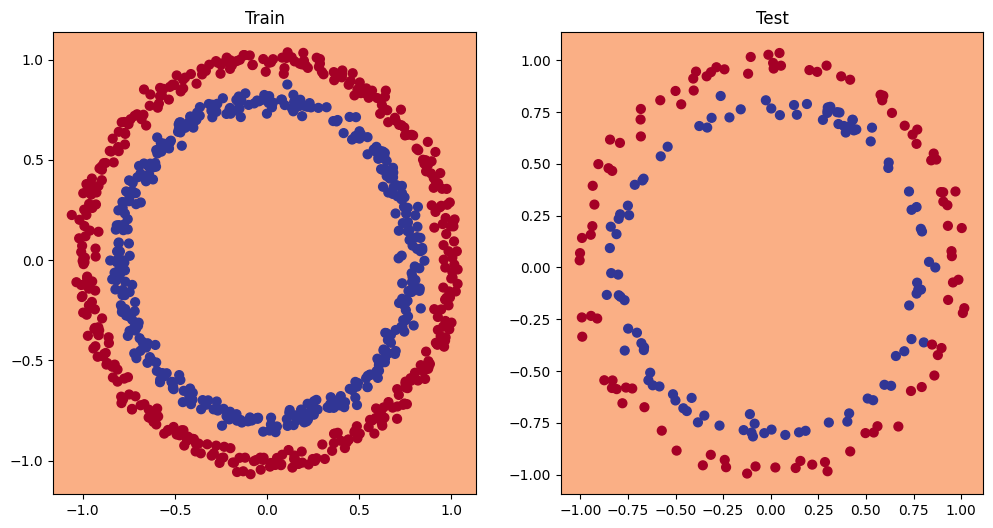

In [74]:
# plot the decision boundaries for the training for the test and test data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
pplot_decision_boundary(model=model_6, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
pplot_decision_boundary(model=model_6, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing models results as much as possible, there are a handful of other classification evaluation methods and metrics:
 * Accuracy
 * Precision
 * Recall
 * F1-score
 * Confusion matrix
 * Classification_report from scikilearn



In [81]:
# check the accuracy of our model
loss, accuracy = model_7.evaluate(X_test, y_test) #best performing model
print("Model loss on the test set", loss)
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%" )

7/7 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9950
Model loss on the test set 0.03697113320231438
Model accuracy on the test set: 99.50%


In [82]:
# let's build confusion matrix
from sklearn.metrics import confusion_matrix

# make_prediction
y_preds = model_7.predict(X_test)

# create a confusion matrix
confusion_matrix(y_test, y_preds)


7/7 [==============================] - 0s 2ms/step


ValueError: ignored

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [ ]:
y_preds[:10]

array([[9.9974006e-01],
       [3.2958696e-03],
       [9.9986100e-01],
       [5.9660553e-05],
       [9.7513473e-01],
       [9.6731871e-01],
       [1.3229875e-05],
       [3.5161956e-06],
       [9.9953485e-01],
       [8.5490674e-04]], dtype=float32)

Oops...looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [ ]:
# convert prediciton probabilities to binary form
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [83]:
# create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[ 99,   1],
       [  0, 100]])


prettify our confusion matrix

> **Note:** the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix


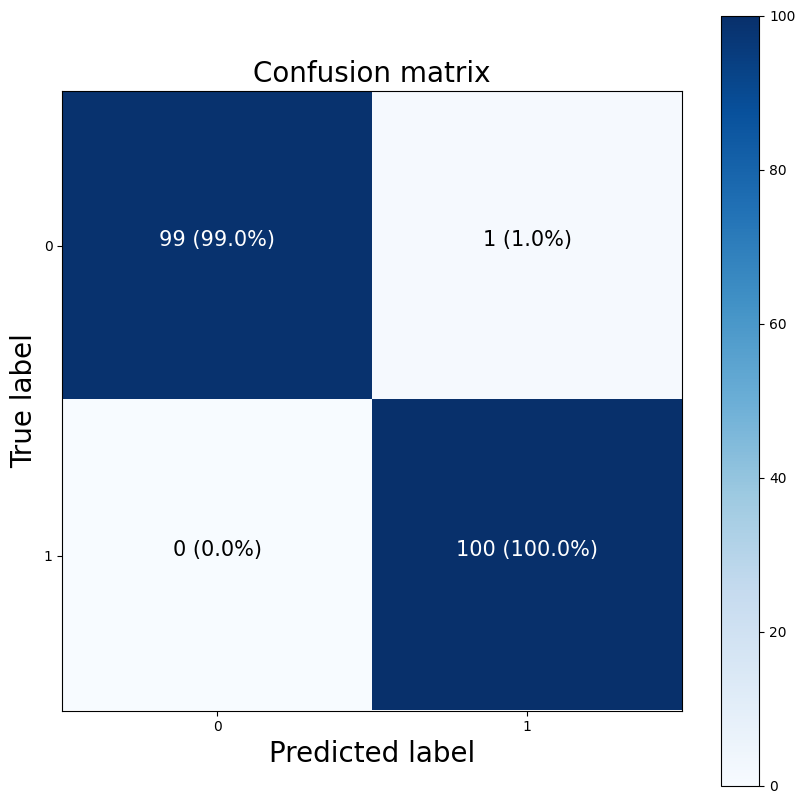

In [84]:
import itertools

figsize = (10,10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax= plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks = np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label axis
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set the thresold for different colors
thresold = (cm.max() + cm.min())/2

# plot the textr on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
  horizontalalignment = "center",
  color = "white" if cm[i, j] > thresold else "black",
  size=15)

## Working with a larger example(multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**

* This means if you have 3 different classes, it's a multi-class classification
* It also means if you have 100 different classes, it's a multi-class classification


In [85]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# data already sorted
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [86]:
# show the training example
print(f"Training ssmple:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training ssmple:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [87]:
#  check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

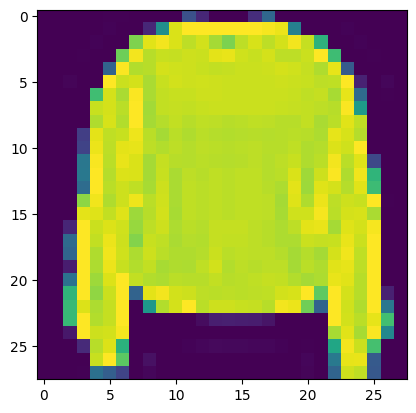

In [88]:
# plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[7]);

In [89]:
# check out samples label
train_labels[7]

2

In [90]:
#  Create a small list so we can index onto our training so they're human-readable
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Pullover')

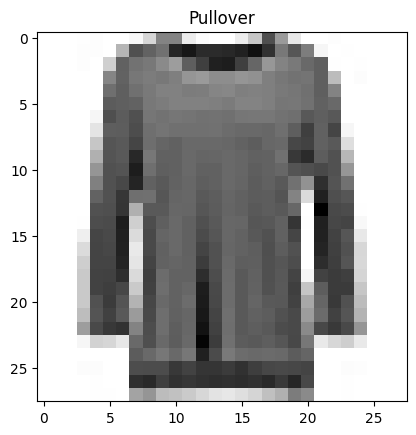

In [91]:
# plot an example image and its label
index = 199
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

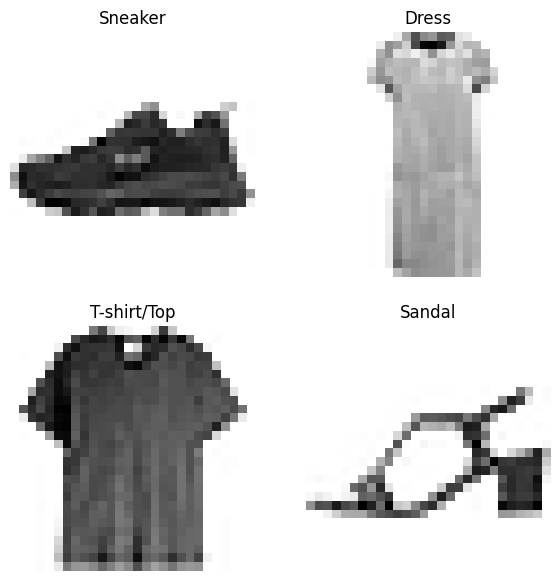

In [92]:
# plot multiple random images of fashion mnist
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classfiers, however, we're going to have  to tweak a few things

* Input Shape = 28 * 28 (the shape of the image)
* Output shape = 10(one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy
* Outout layer activation = Softmax(not sigmpoid)

In [93]:
# Set random seed
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# flatens the data
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

# compile the model
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = model_10.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3463 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

<Axes: >

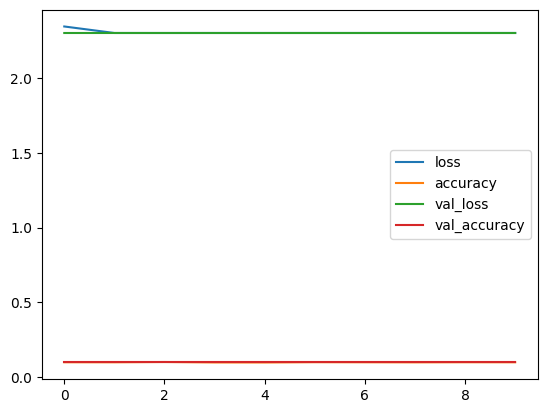

In [94]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot()

In [95]:
# check the model summary
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
#  check the mean and max of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled(or normalized) this means they like to have numbers between 0 and 1

In [97]:
# we can get our training and testing data between 0 and 1 byu dividinf by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max of the scaled data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [98]:
# building same modell on scaled data
# set random seed
tf.random.set_seed(42)

# create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_11.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
norm_history = model_11.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4160 - accuracy: 0.4824 - val_loss: 1.0316 - val_accuracy: 0.6287
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9028 - accuracy: 0.6546 - val_loss: 0.8607 - val_accuracy: 0.6953
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7849 - accuracy: 0.7225 - val_loss: 0.7634 - val_accuracy: 0.7503
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7011 - accuracy: 0.7628 - val_loss: 0.7064 - val_accuracy: 0.7647
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6607 - accuracy: 0.7745 - val_loss: 0.6777 - val_accuracy: 0.7667
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6309 - accuracy: 0.7814 - val_loss: 0.6630 - val_accuracy: 0.7702
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6111 - accuracy: 0.7864 - val_loss: 0.6399 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

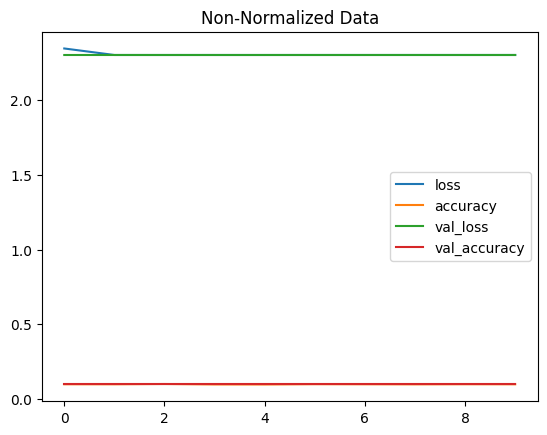

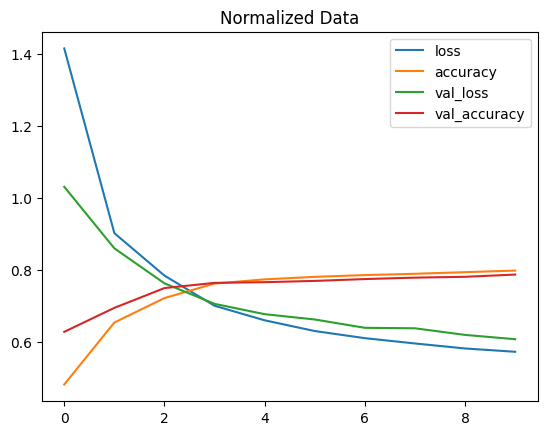

In [99]:
# plot non norm data
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
# plot norm data
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

## Finding the ideal learning rate

In [100]:
# set random seed
tf.random.set_seed(42)

# create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_12.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# learning rate schedule
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_12.fit(train_data_norm, train_labels, epochs=40,validation_data=(test_data_norm, test_labels) ,callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2597 - accuracy: 0.5294 - val_loss: 0.9525 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8655 - accuracy: 0.6855 - val_loss: 0.8136 - val_accuracy: 0.6942 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7635 - accuracy: 0.7125 - val_loss: 0.7561 - val_accuracy: 0.7139 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7174 - accuracy: 0.7345 - val_loss: 0.7324 - val_accuracy: 0.7329 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6970 - accuracy: 0.7432 - val_loss: 0.7277 - val_accuracy: 0.7360 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6853 - accuracy: 0.7467 - val_loss: 0.7102 - val_accuracy: 0.7392 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding ideal learning rate|')

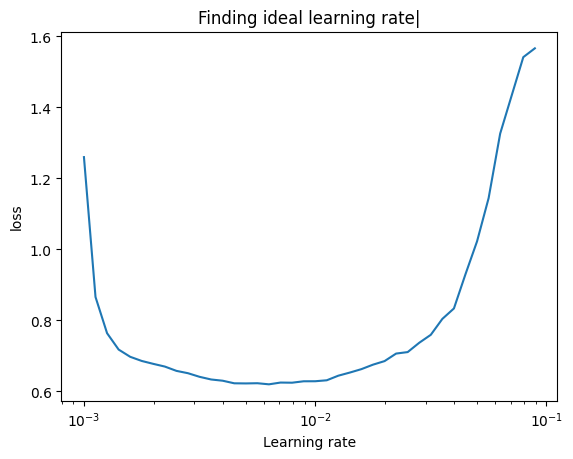

In [101]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Finding ideal learning rate|")

In [102]:
# refitting a model with teh ideal learning rate

# set random seed
tf.random.set_seed(42)

# create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

# fit the model
model_13.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3953 - accuracy: 0.4490 - val_loss: 1.0275 - val_accuracy: 0.6456
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8913 - accuracy: 0.6827 - val_loss: 0.7964 - val_accuracy: 0.7253
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7284 - accuracy: 0.7367 - val_loss: 0.7113 - val_accuracy: 0.7387
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6685 - accuracy: 0.7522 - val_loss: 0.6855 - val_accuracy: 0.7462
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6437 - accuracy: 0.7591 - val_loss: 0.6742 - val_accuracy: 0.7506
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6311 - accuracy: 0.7632 - val_loss: 0.6617 - val_accuracy: 0.7510
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6224 - accuracy: 0.7670 - val_loss: 0.6630 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application


In [103]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15 ):

  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  # let's prettify it
  fig, ax= plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks = np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label axis
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the thresold for different colors
  thresold = (cm.max() + cm.min())/2

  # plot the textr on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i, j] > thresold else "black",
    size=15)

In [104]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [105]:
# make some prediction with model
y_probs = model_13.predict(test_data_norm)#probs is short for predcition probability

# view the first 5 preds
y_probs[:5]


313/313 [==============================] - 1s 2ms/step


array([[3.4585919e-06, 5.3402840e-07, 7.7184412e-11, 1.2038305e-04,
        4.8638510e-10, 2.4058318e-01, 1.3445395e-08, 1.2310805e-01,
        6.3618948e-04, 6.3554829e-01],
       [4.9184440e-03, 3.5655058e-03, 5.0358576e-01, 6.1856154e-03,
        3.1475514e-01, 2.4320362e-11, 1.6493645e-01, 6.7098935e-15,
        2.0531008e-03, 1.3736280e-10],
       [5.5523655e-11, 9.9951005e-01, 2.5022073e-08, 2.5781844e-04,
        2.3003630e-04, 1.9098584e-28, 7.5550605e-10, 5.1471621e-29,
        1.9849647e-06, 2.7468094e-13],
       [6.0007880e-12, 9.9948138e-01, 8.6721803e-11, 5.1048701e-04,
        8.1134403e-06, 7.3130315e-31, 9.4468140e-12, 2.0589841e-32,
        6.2700167e-08, 1.0997541e-12],
       [4.7030166e-01, 1.3252550e-04, 3.7955843e-02, 5.1181562e-02,
        9.5120221e-03, 1.9325562e-05, 4.3027508e-01, 3.8795415e-11,
        6.2156830e-04, 3.6141350e-07]], dtype=float32)

In [106]:
# convert all of the prediction probabilties into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10prediction
y_preds[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

In [107]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [108]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[715,   1,   8,  83,   5,   1, 166,   0,  21,   0],
       [  5, 919,   7,  40,  26,   0,   0,   0,   3,   0],
       [ 13,   1, 521,   8, 269,   0, 185,   0,   3,   0],
       [ 41,   9,   6, 824,  38,   0,  63,   0,  17,   2],
       [  0,   2, 214,  33, 697,   0,  53,   0,   1,   0],
       [  4,   0,   0,   1,   0, 867,   0,  65,  29,  34],
       [142,   0, 254,  56,  83,   2, 440,   0,  23,   0],
       [  0,   0,   0,   0,   0,  47,   0, 917,   2,  34],
       [  5,   1,   8,  14,   3,  10,  59,   5, 895,   0],
       [  0,   0,   0,   4,   0,  35,   1,  55,   1, 904]])

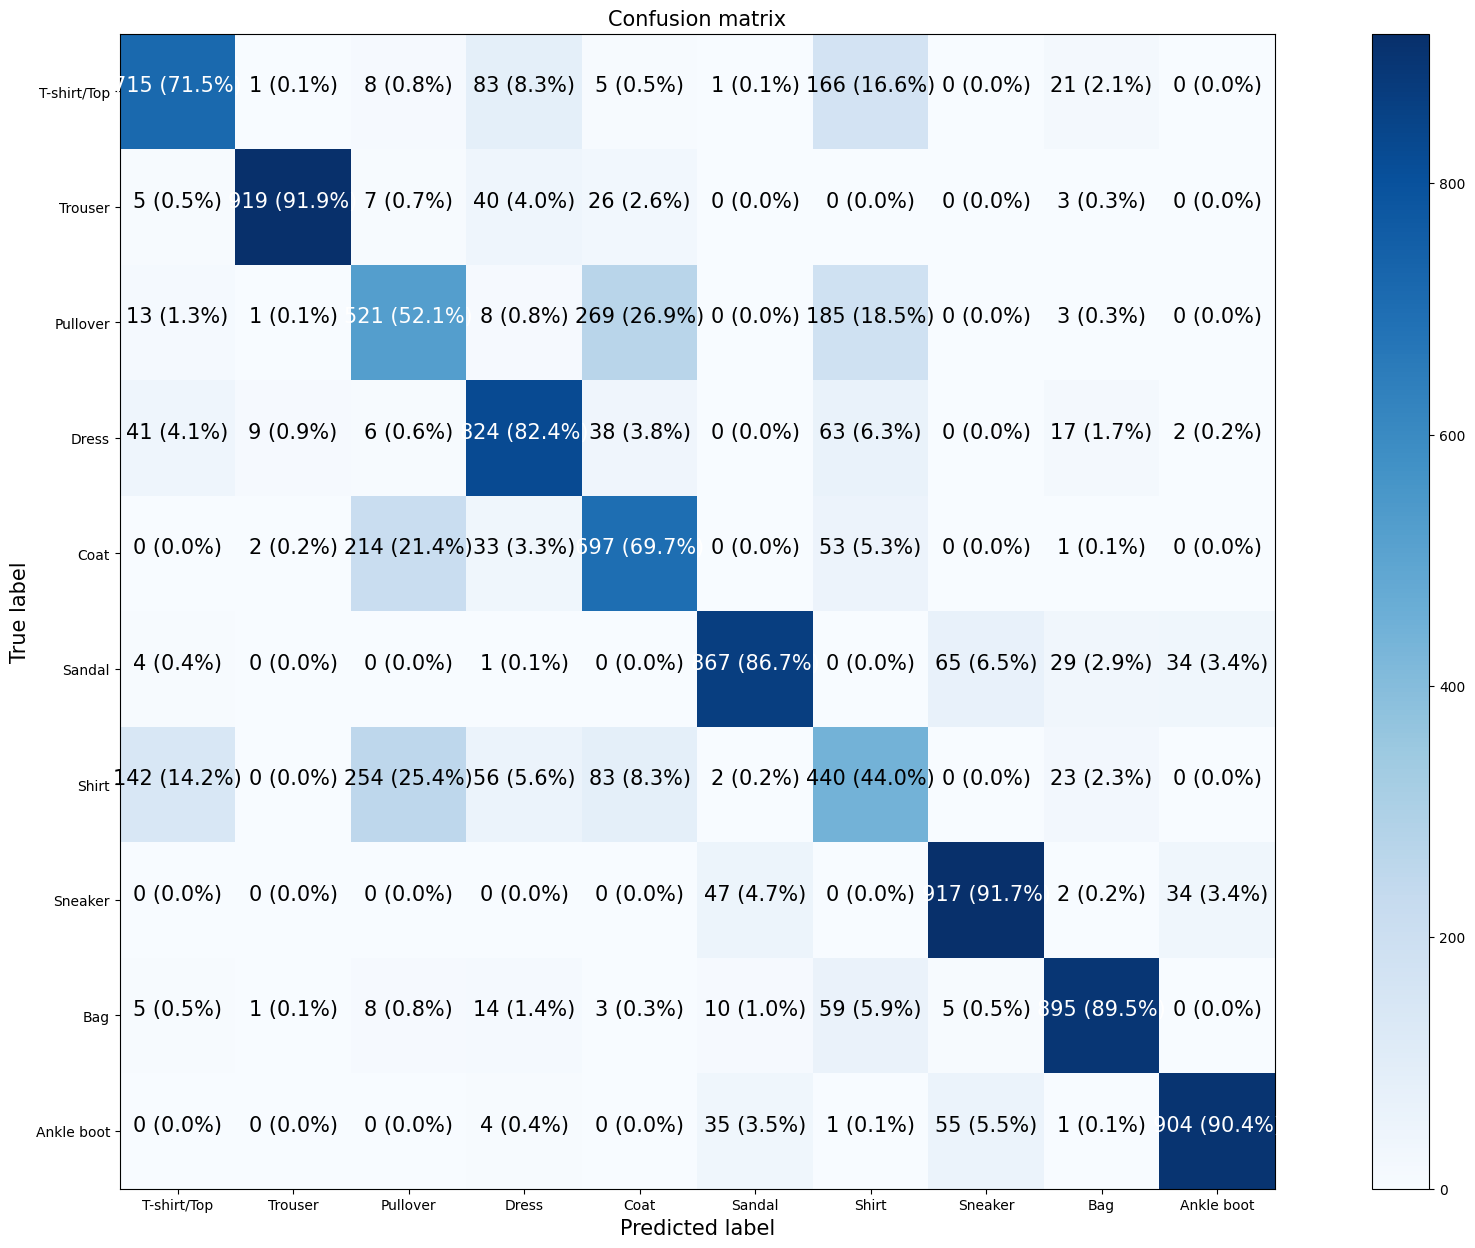

In [109]:
# pretty confusion matrix
make_confusion_matrix(
    y_true = test_labels,
    y_pred = y_preds,
    classes = class_names,
    figsize=(25,15),
    text_size=15
)

**Note:** Often when working with images and other form of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of our model

Create a function to do so:
 * Plot a random image
 * Make a prediction on said image
 * Label the plot with the truth label and the predicted label

In [118]:
import random

def plot_image(model, n, classes, true_labels, images):
  """
  plots random images in range of i
  """
  for i in range(n):
        ax= plt.subplot(3,4, i+1)
        # random_index = random.choice(range(len(test_data_normal)))
        random_index =  random.randint(0, len(images)-1)
        # true_label, img = true_label[random_index], img[random_index]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.axis(False)
        # plt.imshow(images[random_index], cmap=plt.cm.binary)
        # plt.imshow(train_data[random_index], cmap=plt.cm.binary)
        # plt.title(classes[train_labels[random_index]])

        # create predciton and targbets
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1,28,28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]


        # predicted_label = np.argmax(predictions_array)
        if pred_label == true_label:
          color = 'blue'
        else:
          color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),color=color)
        plt.imshow(target_image, cmap=plt.cm.binary)

def plot_value_array(i, predictions_array, true_label):
  """
  plots bar chart of predicted image
  """
  for i in range(i):
        true_label = true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_array)

        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')


import random

def plot_images(model, n, classes, true_labels, images):
    """
    Plots random images and their predicted and true labels.
    """
    for i in range(n):
        ax = plt.subplot(5, 2, i+1)
        random_index = random.randint(0, len(images)-1)
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]

        if pred_label == true_label:
            color = "blue"
        else:
            color = "red"
        ax.set_title("{} {:2.0f}% ({})".format(pred_label, 100*np.max(pred_probs), true_label),
                 color=color)
        ax.axis(False)
        ax.imshow(target_image, cmap=plt.cm.binary);
    plt.tight_layout() #adjust the layout
    plt.show();

def predict_class(model, images, true_labels, classes, class_num, num_images):
    """
    Takes random class and makes prediction on it
    """
    class_indices = [index for index, label in enumerate(true_labels) if label == class_num]
    random_indices = random.sample(class_indices, num_images)

    for i, random_index in enumerate(random_indices):
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]

        color = "blue" if pred_label == true_label else "red"

        ax = plt.subplot(3, 3, i+1)
        ax.set_title("{} {:2.0f}% ({})".format(pred_label, 100*np.max(pred_probs), true_label),
                     color=color)
        ax.axis(False)
        ax.imshow(target_image, cmap=plt.cm.binary)

    plt.tight_layout() # Adjust the layout
    plt.show()

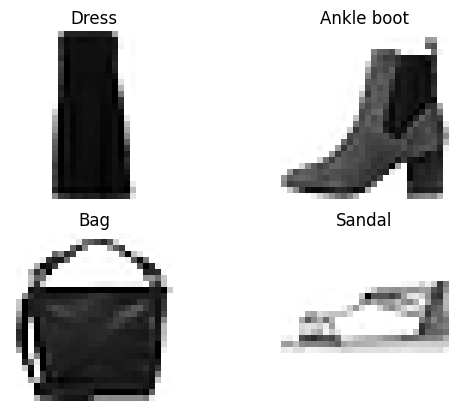

In [119]:
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## What patterns is our model learning?

In [113]:
# find the layers of most recent model
model_13.layers

In [114]:
# extract a particular layer
model_13.layers[0]

In [115]:
# get the patterns of a layers in our network
weights, biases = model_13.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[-0.09653232,  0.5261256 ,  0.00664537,  0.04753147],
        [-0.18644753,  1.4077288 ,  0.05627823, -0.20533031],
        [-0.58819777,  0.8598965 , -0.02072556, -0.77829427],
        ...,
        [ 0.20761964,  0.35392135,  0.05524005, -0.2634051 ],
        [ 0.06193967,  0.4695631 , -0.00406917,  0.08959762],
        [-0.13165537,  0.38577476, -0.00156124, -0.05800824]],
       dtype=float32),
 (784, 4))

Now, let's checkout bias vector

In [116]:
biases, biases.shape

(array([ 1.8040054 ,  2.42761   , -0.03183967,  2.7203286 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with the weights matrix.

The bias vector get initialized as zeros(at least in the case of tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

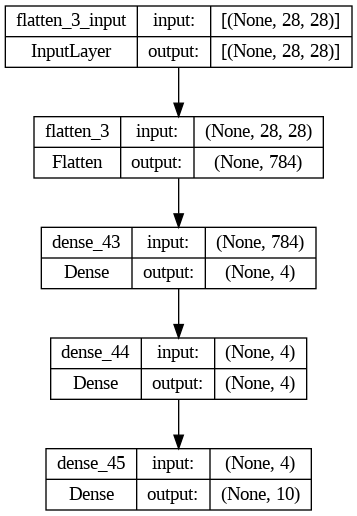

In [117]:
# let's check out another way of viewing deeplearning models
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of the model
plot_model(model_13, show_shapes=True)